# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2
import random
import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

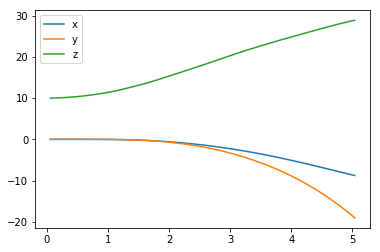

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

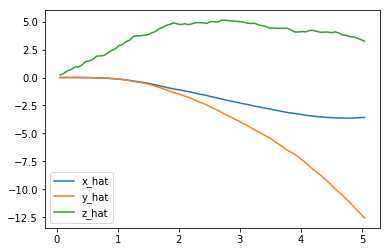

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

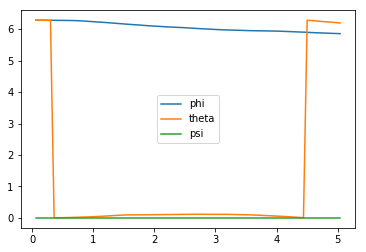

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

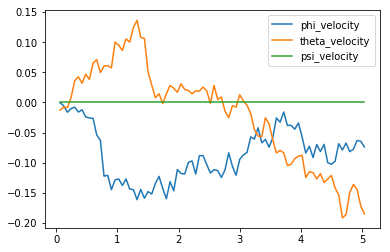

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

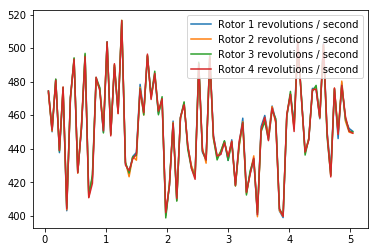

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -8.77555626 -19.05705031  28.88288666   5.85747642   6.197955
   0.        ]
[ -3.57022454 -12.56551473   3.25247742]
[-0.07384762 -0.18499663  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [1]:
%load_ext autoreload
%autoreload 2
import random
import csv
import numpy as np
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import matplotlib.pyplot as plt
%matplotlib notebook

Using TensorFlow backend.


In [ ]:
#Sets the problem parameters
num_episodes = 10000
init_pose = [0.,0.,10.,0.,0.,0.]
target_pos = np.array([0., 0., 20.])
file_output = 'test.csv'

#Setting the reward function
#Initialize the task and the agend
task = Task(init_pose=init_pose,target_pos=target_pos)
agent = DDPG(task) 

#Keeps track of reward_sum counter
rewards_sum = []

# Run the simulation, and save the results.
labels = ['episode','time', 'reward', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

with open(file_output, 'w') as csvfile:            
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        #Resets the enviroment
        state = agent.reset_episode() # start a new episode

        #Keeps track of reward_sum counter
        reward_sum = 0

        while True:
            #Gets (St,At,Rt+1,St+1)
            action = agent.act(state) 
            next_state, reward, done, rotor_speeds = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state

            #Saves the results on file_output.csv
            to_write = [i_episode] + [task.sim.time] + [reward] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            
            #Keeps track of reward_sum counter
            reward_sum += reward

            if done:
                #Keeps track of reward_sum counter
                rewards_sum.append(reward_sum)

                print("\rEpisode = {:4d}, Final Reward = {}, Sum of Rewards = {}".format(i_episode, reward, reward_sum, end=""))  # [debug]
                break
        sys.stdout.flush()

Episode =    1, Final Reward = -1.4865150783225163, Sum of Rewards = 4.9953622567893365
Episode =    2, Final Reward = -1.4891775579320607, Sum of Rewards = 4.957918043665238
Episode =    3, Final Reward = -1.495550493752392, Sum of Rewards = 4.924800130843957
Episode =    4, Final Reward = -1.472946842523452, Sum of Rewards = 6.783270261217819
Episode =    5, Final Reward = -1.4915816255278345, Sum of Rewards = 14.040036180705858
Episode =    6, Final Reward = -1.3997633507488083, Sum of Rewards = 119.42746519582316
Episode =    7, Final Reward = -1.5007525845049519, Sum of Rewards = 12.237739725733995
Episode =    8, Final Reward = -1.5038867473362225, Sum of Rewards = 10.61296061778624
Episode =    9, Final Reward = -1.5038867473362225, Sum of Rewards = 11.038936926478035
Episode =   10, Final Reward = -1.4955825189465037, Sum of Rewards = 8.91689881410103
Episode =   11, Final Reward = -1.5038867473362225, Sum of Rewards = 11.467792693231287
Episode =   12, Final Reward = -1.465383

Episode =   96, Final Reward = -1.4864342862587925, Sum of Rewards = 8.491253849823327
Episode =   97, Final Reward = -1.4989946120319195, Sum of Rewards = 5.147725021088547
Episode =   98, Final Reward = 1.2459155738808698, Sum of Rewards = 169.04201811256792
Episode =   99, Final Reward = -1.5038867473362225, Sum of Rewards = 8.39729917865548
Episode =  100, Final Reward = 2.56656023789256, Sum of Rewards = 97.70566223185752
Episode =  101, Final Reward = 2.9994364317376734, Sum of Rewards = 121.54083842667988
Episode =  102, Final Reward = -1.4783517940203965, Sum of Rewards = 6.613370818784169
Episode =  103, Final Reward = -1.5035483354142274, Sum of Rewards = 5.934874331310778
Episode =  104, Final Reward = 1.8813005057962944, Sum of Rewards = 189.67568305206044
Episode =  105, Final Reward = 2.984529522954733, Sum of Rewards = 129.60845636089337
Episode =  106, Final Reward = -1.4889325351775726, Sum of Rewards = 8.145505775011209
Episode =  107, Final Reward = -1.50039973668102

Episode =  190, Final Reward = -1.5038867473362225, Sum of Rewards = 7.194693536635958
Episode =  191, Final Reward = -1.5038867473362225, Sum of Rewards = 1.506856996946672
Episode =  192, Final Reward = -1.4992127938831976, Sum of Rewards = 12.62193280774207
Episode =  193, Final Reward = -1.4626958728945705, Sum of Rewards = 11.375415396616365
Episode =  194, Final Reward = -1.476458733096059, Sum of Rewards = 11.922581559825627
Episode =  195, Final Reward = -1.5038867473362225, Sum of Rewards = 5.479337932996456
Episode =  196, Final Reward = -1.5038867473362225, Sum of Rewards = 17.1834014732563
Episode =  197, Final Reward = -1.4725954029155903, Sum of Rewards = 10.57275591583957
Episode =  198, Final Reward = -1.5038867473362225, Sum of Rewards = 19.22617821972093
Episode =  199, Final Reward = -1.5038867473362225, Sum of Rewards = 3.331037480823908
Episode =  200, Final Reward = -1.4772822474498652, Sum of Rewards = 29.249001392060492
Episode =  201, Final Reward = -1.48716921

Episode =  284, Final Reward = -1.4693784696742438, Sum of Rewards = 33.029786988630384
Episode =  285, Final Reward = -1.490643471550626, Sum of Rewards = 2.5195266752173704
Episode =  286, Final Reward = -1.4575367468210936, Sum of Rewards = 23.67367037393765
Episode =  287, Final Reward = -1.5038867473362225, Sum of Rewards = 29.47889530286166
Episode =  288, Final Reward = -1.4653152285546178, Sum of Rewards = 23.682859772483337
Episode =  289, Final Reward = -1.5025946972945428, Sum of Rewards = 5.08993600169144
Episode =  290, Final Reward = -1.5038867473362225, Sum of Rewards = 3.7515963860459554
Episode =  291, Final Reward = -1.4694972528746542, Sum of Rewards = 14.814052390138698
Episode =  292, Final Reward = -1.498049546957172, Sum of Rewards = 13.9086326230472
Episode =  293, Final Reward = -1.4876907097732186, Sum of Rewards = 10.40433098626817
Episode =  294, Final Reward = -1.4898835007201965, Sum of Rewards = 8.897722454470511
Episode =  295, Final Reward = -1.49760173

Episode =  378, Final Reward = -1.48945995447633, Sum of Rewards = 6.907575366890376
Episode =  379, Final Reward = -1.4674041148038022, Sum of Rewards = 5.203945595299946
Episode =  380, Final Reward = -1.4919216147477794, Sum of Rewards = 9.430646479561931
Episode =  381, Final Reward = -1.4767720482505866, Sum of Rewards = 6.658574887934071
Episode =  382, Final Reward = -1.4737701598799582, Sum of Rewards = 3.657268766673228
Episode =  383, Final Reward = -1.5038867473362225, Sum of Rewards = 12.295721650268518
Episode =  384, Final Reward = -1.4672463277562047, Sum of Rewards = 6.56614702069819
Episode =  385, Final Reward = -1.4933422548180517, Sum of Rewards = 6.710651567895965
Episode =  386, Final Reward = -1.5023591114636083, Sum of Rewards = 10.822450619587869
Episode =  387, Final Reward = -1.5038867473362225, Sum of Rewards = 9.08795193489196
Episode =  388, Final Reward = -1.4600355145346269, Sum of Rewards = 6.729294129959423
Episode =  389, Final Reward = -1.49759713193

Episode =  472, Final Reward = -1.5038867473362225, Sum of Rewards = 12.172595587660222
Episode =  473, Final Reward = -1.4875416291560728, Sum of Rewards = 9.550509539753373
Episode =  474, Final Reward = -1.5038867473362225, Sum of Rewards = 13.545086351893081
Episode =  475, Final Reward = -1.5038867473362225, Sum of Rewards = -9.031898158236215
Episode =  476, Final Reward = -1.497261134867848, Sum of Rewards = 11.392916439743303
Episode =  477, Final Reward = -1.498655046390366, Sum of Rewards = 11.98566118298293
Episode =  478, Final Reward = -1.4952219055530516, Sum of Rewards = 7.167478068209256
Episode =  479, Final Reward = -1.4664726101540975, Sum of Rewards = 10.492876334569464
Episode =  480, Final Reward = -1.4786842749007105, Sum of Rewards = 18.441257146249097
Episode =  481, Final Reward = -1.5038867473362225, Sum of Rewards = 12.323857722336978
Episode =  482, Final Reward = -2.949322139972807, Sum of Rewards = -128.04713465261676
Episode =  483, Final Reward = 2.9335

Episode =  572, Final Reward = -2.999999999999478, Sum of Rewards = -128.3277795414043
Episode =  573, Final Reward = -3.0, Sum of Rewards = -128.30368720319058
Episode =  574, Final Reward = -2.9999999999999973, Sum of Rewards = -128.33416807400405
Episode =  575, Final Reward = -3.0, Sum of Rewards = -128.32320906286657
Episode =  576, Final Reward = -3.0, Sum of Rewards = -128.33391596465458
Episode =  577, Final Reward = -2.9999999999999996, Sum of Rewards = -128.3607929884596
Episode =  578, Final Reward = -3.0, Sum of Rewards = -128.3048896417373
Episode =  579, Final Reward = -3.0, Sum of Rewards = -128.32767865520995
Episode =  580, Final Reward = -3.0, Sum of Rewards = -128.31651357703936
Episode =  581, Final Reward = -2.9999999999999973, Sum of Rewards = -128.32300734881687
Episode =  582, Final Reward = -3.0, Sum of Rewards = -128.23471359976142
Episode =  583, Final Reward = -3.0, Sum of Rewards = -128.30282527944394
Episode =  584, Final Reward = -3.0, Sum of Rewards = -1

Episode =  681, Final Reward = -3.0, Sum of Rewards = -128.3063157537341
Episode =  682, Final Reward = -3.0, Sum of Rewards = -128.31449754487295
Episode =  683, Final Reward = -3.0, Sum of Rewards = -128.28357043560135
Episode =  684, Final Reward = -3.0, Sum of Rewards = -128.331604704841
Episode =  685, Final Reward = -3.0, Sum of Rewards = -128.27648713034478
Episode =  686, Final Reward = -3.0, Sum of Rewards = -128.3021513581022
Episode =  687, Final Reward = -3.0, Sum of Rewards = -128.3144924861579
Episode =  688, Final Reward = -3.0, Sum of Rewards = -128.3080855355887
Episode =  689, Final Reward = -3.0, Sum of Rewards = -128.42597822390033
Episode =  690, Final Reward = -3.0, Sum of Rewards = -128.37934680824196
Episode =  691, Final Reward = -3.0, Sum of Rewards = -128.29335773819525
Episode =  692, Final Reward = -3.0, Sum of Rewards = -128.3102980498746
Episode =  693, Final Reward = -3.0, Sum of Rewards = -128.2663393025908
Episode =  694, Final Reward = -3.0, Sum of Re

Episode =  789, Final Reward = -3.0, Sum of Rewards = -128.27802949837405
Episode =  790, Final Reward = -3.0, Sum of Rewards = -128.39400357195333
Episode =  791, Final Reward = -3.0, Sum of Rewards = -128.28376556767284
Episode =  792, Final Reward = -3.0, Sum of Rewards = -110.48316039336933
Episode =  793, Final Reward = -3.0, Sum of Rewards = -128.31632624335668
Episode =  794, Final Reward = -3.0, Sum of Rewards = -128.30338937778808
Episode =  795, Final Reward = -3.0, Sum of Rewards = -128.30341304492876
Episode =  796, Final Reward = -3.0, Sum of Rewards = -128.30429993234935
Episode =  797, Final Reward = -3.0, Sum of Rewards = -128.31730669632483
Episode =  798, Final Reward = -3.0, Sum of Rewards = -128.2995702490186
Episode =  799, Final Reward = -3.0, Sum of Rewards = -128.33406531351818
Episode =  800, Final Reward = -3.0, Sum of Rewards = -128.32984148142026
Episode =  801, Final Reward = -3.0, Sum of Rewards = -128.35761564214528
Episode =  802, Final Reward = -3.0, Su

Episode =  899, Final Reward = -3.0, Sum of Rewards = -128.32726549140278
Episode =  900, Final Reward = -3.0, Sum of Rewards = -128.28504205213136
Episode =  901, Final Reward = -3.0, Sum of Rewards = -128.2913874125332
Episode =  902, Final Reward = -3.0, Sum of Rewards = -128.2628411752118
Episode =  903, Final Reward = -3.0, Sum of Rewards = -128.2800910996035
Episode =  904, Final Reward = -3.0, Sum of Rewards = -128.37399887959697
Episode =  905, Final Reward = -3.0, Sum of Rewards = -128.31829791555123
Episode =  906, Final Reward = -3.0, Sum of Rewards = -128.2927753952029
Episode =  907, Final Reward = -3.0, Sum of Rewards = -128.33148045243706
Episode =  908, Final Reward = -3.0, Sum of Rewards = -128.29662802319194
Episode =  909, Final Reward = -3.0, Sum of Rewards = -128.31825456030677
Episode =  910, Final Reward = -3.0, Sum of Rewards = -128.34517327605766
Episode =  911, Final Reward = -3.0, Sum of Rewards = -128.38198203203876
Episode =  912, Final Reward = -3.0, Sum o

Episode = 1008, Final Reward = -3.0, Sum of Rewards = -128.287347114801
Episode = 1009, Final Reward = -3.0, Sum of Rewards = -128.27718974957776
Episode = 1010, Final Reward = -3.0, Sum of Rewards = -128.39714933439075
Episode = 1011, Final Reward = -3.0, Sum of Rewards = -128.32764802928526
Episode = 1012, Final Reward = -3.0, Sum of Rewards = -128.22540449966112
Episode = 1013, Final Reward = -2.9999999999999996, Sum of Rewards = -128.2861029671811
Episode = 1014, Final Reward = -3.0, Sum of Rewards = -128.34910635408642
Episode = 1015, Final Reward = -3.0, Sum of Rewards = -128.2880391658823
Episode = 1016, Final Reward = -3.0, Sum of Rewards = -128.39083037270137
Episode = 1017, Final Reward = -3.0, Sum of Rewards = -128.3045658638535
Episode = 1018, Final Reward = -3.0, Sum of Rewards = -128.3730163381862
Episode = 1019, Final Reward = -3.0, Sum of Rewards = -128.31423895224978
Episode = 1020, Final Reward = -3.0, Sum of Rewards = -128.32430000166124
Episode = 1021, Final Reward 

Episode = 1117, Final Reward = -3.0, Sum of Rewards = -128.2978617856446
Episode = 1118, Final Reward = -3.0, Sum of Rewards = -128.2854392476106
Episode = 1119, Final Reward = -3.0, Sum of Rewards = -128.36235493114498
Episode = 1120, Final Reward = -3.0, Sum of Rewards = -128.31474021014026
Episode = 1121, Final Reward = -3.0, Sum of Rewards = -128.2965400452312
Episode = 1122, Final Reward = -3.0, Sum of Rewards = -128.28335719853393
Episode = 1123, Final Reward = -2.9999999999999996, Sum of Rewards = -128.35027708805492
Episode = 1124, Final Reward = -3.0, Sum of Rewards = -128.27038918547743
Episode = 1125, Final Reward = -3.0, Sum of Rewards = -128.3089301517188
Episode = 1126, Final Reward = -3.0, Sum of Rewards = -128.2893196965546
Episode = 1127, Final Reward = -3.0, Sum of Rewards = -128.2679163832873
Episode = 1128, Final Reward = -3.0, Sum of Rewards = -128.2948755651625
Episode = 1129, Final Reward = -3.0, Sum of Rewards = -128.29165356691314
Episode = 1130, Final Reward =

Episode = 1226, Final Reward = -3.0, Sum of Rewards = -128.28080324584016
Episode = 1227, Final Reward = -3.0, Sum of Rewards = -128.30415519193576
Episode = 1228, Final Reward = -3.0, Sum of Rewards = -107.40878049266169
Episode = 1229, Final Reward = -2.9999999999834683, Sum of Rewards = -128.281867080204
Episode = 1230, Final Reward = -3.0, Sum of Rewards = -128.30011173875278
Episode = 1231, Final Reward = -3.0, Sum of Rewards = -128.26001404785427
Episode = 1232, Final Reward = -2.9999999999999996, Sum of Rewards = -128.36108979817072
Episode = 1233, Final Reward = -2.999999999999136, Sum of Rewards = -128.35851603004048
Episode = 1234, Final Reward = -3.0, Sum of Rewards = -128.34822805984902
Episode = 1235, Final Reward = -3.0, Sum of Rewards = -128.2348221060582
Episode = 1236, Final Reward = -3.0, Sum of Rewards = -128.27796756349744
Episode = 1237, Final Reward = -2.9999999999999996, Sum of Rewards = -128.37905056235144
Episode = 1238, Final Reward = -3.0, Sum of Rewards = -1

Episode = 1334, Final Reward = -3.0, Sum of Rewards = -128.32280607290122
Episode = 1335, Final Reward = -3.0, Sum of Rewards = -128.2932818076376
Episode = 1336, Final Reward = -3.0, Sum of Rewards = -128.35893824237638
Episode = 1337, Final Reward = -3.0, Sum of Rewards = -128.31086434777285
Episode = 1338, Final Reward = -3.0, Sum of Rewards = -119.401115674037
Episode = 1339, Final Reward = -3.0, Sum of Rewards = -128.31904021730836
Episode = 1340, Final Reward = -3.0, Sum of Rewards = -128.29209495113906
Episode = 1341, Final Reward = -3.0, Sum of Rewards = -128.33652829467454
Episode = 1342, Final Reward = -3.0, Sum of Rewards = -128.26645139412523
Episode = 1343, Final Reward = -3.0, Sum of Rewards = -128.30358684816542
Episode = 1344, Final Reward = -3.0, Sum of Rewards = -128.32516243880787
Episode = 1345, Final Reward = -3.0, Sum of Rewards = -128.26390685654133
Episode = 1346, Final Reward = -3.0, Sum of Rewards = -128.31741895867327
Episode = 1347, Final Reward = -3.0, Sum 

Episode = 1443, Final Reward = -3.0, Sum of Rewards = -128.36570377670319
Episode = 1444, Final Reward = -3.0, Sum of Rewards = -128.29449241693288
Episode = 1445, Final Reward = -3.0, Sum of Rewards = -128.31081143552277
Episode = 1446, Final Reward = -3.0, Sum of Rewards = -128.2817705465052
Episode = 1447, Final Reward = -3.0, Sum of Rewards = -128.29848774890473
Episode = 1448, Final Reward = -3.0, Sum of Rewards = -128.3306268448303
Episode = 1449, Final Reward = -3.0, Sum of Rewards = -128.31355730339797
Episode = 1450, Final Reward = -3.0, Sum of Rewards = -104.54118835569884
Episode = 1451, Final Reward = -3.0, Sum of Rewards = -128.28218470930483
Episode = 1452, Final Reward = -3.0, Sum of Rewards = -128.2736777774387
Episode = 1453, Final Reward = -3.0, Sum of Rewards = -128.3900251673751
Episode = 1454, Final Reward = -3.0, Sum of Rewards = -128.27067436184421
Episode = 1455, Final Reward = -3.0, Sum of Rewards = -128.29522477619324
Episode = 1456, Final Reward = -2.99999999

Episode = 1553, Final Reward = -3.0, Sum of Rewards = -128.2557689013601
Episode = 1554, Final Reward = -3.0, Sum of Rewards = -128.31909796900925
Episode = 1555, Final Reward = -3.0, Sum of Rewards = -128.40372379548387
Episode = 1556, Final Reward = -3.0, Sum of Rewards = -125.38991702587434
Episode = 1557, Final Reward = -3.0, Sum of Rewards = -128.2946741661183
Episode = 1558, Final Reward = -3.0, Sum of Rewards = -128.26156601304854
Episode = 1559, Final Reward = -3.0, Sum of Rewards = -125.47472733308074
Episode = 1560, Final Reward = -3.0, Sum of Rewards = -128.34915182619068
Episode = 1561, Final Reward = -3.0, Sum of Rewards = -128.3393258102192
Episode = 1562, Final Reward = -3.0, Sum of Rewards = -128.31111509629187
Episode = 1563, Final Reward = -3.0, Sum of Rewards = -128.3035915084319
Episode = 1564, Final Reward = -3.0, Sum of Rewards = -128.3545981663185
Episode = 1565, Final Reward = -3.0, Sum of Rewards = -128.4098887549032
Episode = 1566, Final Reward = -3.0, Sum of 

Episode = 1662, Final Reward = -3.0, Sum of Rewards = -128.2833903241476
Episode = 1663, Final Reward = -3.0, Sum of Rewards = -128.34053502428634
Episode = 1664, Final Reward = -3.0, Sum of Rewards = -128.28790029734353
Episode = 1665, Final Reward = -3.0, Sum of Rewards = -128.31966951479967
Episode = 1666, Final Reward = -3.0, Sum of Rewards = -128.30141315358418
Episode = 1667, Final Reward = -3.0, Sum of Rewards = -128.3327079682468
Episode = 1668, Final Reward = -3.0, Sum of Rewards = -128.354580655917
Episode = 1669, Final Reward = -3.0, Sum of Rewards = -128.30244303999032
Episode = 1670, Final Reward = -3.0, Sum of Rewards = -128.36720249221344
Episode = 1671, Final Reward = -2.9999999999999996, Sum of Rewards = -128.2716458576922
Episode = 1672, Final Reward = -3.0, Sum of Rewards = -128.28209572912533
Episode = 1673, Final Reward = -2.999999999999611, Sum of Rewards = -128.3723161657946
Episode = 1674, Final Reward = -3.0, Sum of Rewards = -128.31321455549454
Episode = 1675,

Episode = 1771, Final Reward = -3.0, Sum of Rewards = -128.3184684661508
Episode = 1772, Final Reward = -3.0, Sum of Rewards = -128.326122650108
Episode = 1773, Final Reward = -3.0, Sum of Rewards = -128.30743573434336
Episode = 1774, Final Reward = -2.999999999999986, Sum of Rewards = -128.32204057462678
Episode = 1775, Final Reward = -3.0, Sum of Rewards = -128.33862538392927
Episode = 1776, Final Reward = -3.0, Sum of Rewards = -128.3178997138703
Episode = 1777, Final Reward = -3.0, Sum of Rewards = -116.3223612877674
Episode = 1778, Final Reward = -3.0, Sum of Rewards = -128.26566728202738
Episode = 1779, Final Reward = -3.0, Sum of Rewards = -128.43154079151498
Episode = 1780, Final Reward = -3.0, Sum of Rewards = -128.3528758207983
Episode = 1781, Final Reward = -3.0, Sum of Rewards = -128.2711581655264
Episode = 1782, Final Reward = -3.0, Sum of Rewards = -128.3324740155754
Episode = 1783, Final Reward = -3.0, Sum of Rewards = -128.271164125883
Episode = 1784, Final Reward = -3.

Episode = 1880, Final Reward = -2.9999999999999756, Sum of Rewards = -128.31449663912306
Episode = 1881, Final Reward = -3.0, Sum of Rewards = -128.303501426644
Episode = 1882, Final Reward = -2.999999999999778, Sum of Rewards = -128.34366529528535
Episode = 1883, Final Reward = -2.9999999773834727, Sum of Rewards = -128.25212871667284
Episode = 1884, Final Reward = -2.9999999999999996, Sum of Rewards = -128.32479876795082
Episode = 1885, Final Reward = -3.0, Sum of Rewards = -128.28479717053568
Episode = 1886, Final Reward = -2.9999999999988107, Sum of Rewards = -128.3185465423184
Episode = 1887, Final Reward = -3.0, Sum of Rewards = -128.3132472963291
Episode = 1888, Final Reward = -2.9999999999999942, Sum of Rewards = -128.2986886209182
Episode = 1889, Final Reward = -3.0, Sum of Rewards = -128.34434457298985
Episode = 1890, Final Reward = -3.0, Sum of Rewards = -128.28118086788226
Episode = 1891, Final Reward = -2.999999999999993, Sum of Rewards = -128.31744647875712
Episode = 1892

Episode = 1988, Final Reward = -3.0, Sum of Rewards = -128.3731997358199
Episode = 1989, Final Reward = -3.0, Sum of Rewards = -128.2839012646567
Episode = 1990, Final Reward = -3.0, Sum of Rewards = -104.39040645640632
Episode = 1991, Final Reward = -3.0, Sum of Rewards = -128.3035189358884
Episode = 1992, Final Reward = -3.0, Sum of Rewards = -128.33254851839519
Episode = 1993, Final Reward = -3.0, Sum of Rewards = -128.32684610819933
Episode = 1994, Final Reward = -3.0, Sum of Rewards = -128.32362605707823
Episode = 1995, Final Reward = -3.0, Sum of Rewards = -128.32679499243818
Episode = 1996, Final Reward = -3.0, Sum of Rewards = -110.43526861940532
Episode = 1997, Final Reward = -3.0, Sum of Rewards = -128.35408697504405
Episode = 1998, Final Reward = -3.0, Sum of Rewards = -128.31111810360954
Episode = 1999, Final Reward = -3.0, Sum of Rewards = -128.29304802316886
Episode = 2000, Final Reward = -3.0, Sum of Rewards = -128.33020679266386
Episode = 2001, Final Reward = -3.0, Sum 

Episode = 2097, Final Reward = -3.0, Sum of Rewards = -128.30873330774654
Episode = 2098, Final Reward = -3.0, Sum of Rewards = -128.29996527685284
Episode = 2099, Final Reward = -3.0, Sum of Rewards = -128.2435067721703
Episode = 2100, Final Reward = -3.0, Sum of Rewards = -128.37774327995325
Episode = 2101, Final Reward = -2.9999999999999996, Sum of Rewards = -128.3581844364697
Episode = 2102, Final Reward = -2.999999999999989, Sum of Rewards = -128.3570080089879
Episode = 2103, Final Reward = -3.0, Sum of Rewards = -128.325317084729
Episode = 2104, Final Reward = -3.0, Sum of Rewards = -128.2821031902513
Episode = 2105, Final Reward = -3.0, Sum of Rewards = -128.27578585554375
Episode = 2106, Final Reward = -3.0, Sum of Rewards = -128.28057751056355
Episode = 2107, Final Reward = -3.0, Sum of Rewards = -125.6373240985961
Episode = 2108, Final Reward = -3.0, Sum of Rewards = -128.34045161704876
Episode = 2109, Final Reward = -3.0, Sum of Rewards = -128.33591533941183
Episode = 2110, 

Episode = 2206, Final Reward = -2.999999999999435, Sum of Rewards = -128.30202521807584
Episode = 2207, Final Reward = -3.0, Sum of Rewards = -128.29827213416593
Episode = 2208, Final Reward = -3.0, Sum of Rewards = -128.41604672768992
Episode = 2209, Final Reward = -3.0, Sum of Rewards = -128.3147267210088
Episode = 2210, Final Reward = -3.0, Sum of Rewards = -128.2824978944039
Episode = 2211, Final Reward = -3.0, Sum of Rewards = -128.30014507329605
Episode = 2212, Final Reward = -2.999999999999759, Sum of Rewards = -128.3094153721716
Episode = 2213, Final Reward = -3.0, Sum of Rewards = -128.3217455703154
Episode = 2214, Final Reward = -3.0, Sum of Rewards = -128.2965953525998
Episode = 2215, Final Reward = -3.0, Sum of Rewards = -128.31174633533234
Episode = 2216, Final Reward = -3.0, Sum of Rewards = -128.24617968335724
Episode = 2217, Final Reward = -3.0, Sum of Rewards = -128.33669805528652
Episode = 2218, Final Reward = -3.0, Sum of Rewards = -128.28919980031424
Episode = 2219,

Episode = 2315, Final Reward = -3.0, Sum of Rewards = -128.3643598707765
Episode = 2316, Final Reward = -3.0, Sum of Rewards = -128.38443522405652
Episode = 2317, Final Reward = -2.9999999999999996, Sum of Rewards = -128.28769929640643
Episode = 2318, Final Reward = -3.0, Sum of Rewards = -128.31200692846403
Episode = 2319, Final Reward = -3.0, Sum of Rewards = -128.34124102773222
Episode = 2320, Final Reward = -3.0, Sum of Rewards = -128.4334909067959
Episode = 2321, Final Reward = -3.0, Sum of Rewards = -128.2475387275702
Episode = 2322, Final Reward = -3.0, Sum of Rewards = -128.350864775515
Episode = 2323, Final Reward = -3.0, Sum of Rewards = -128.34428275263843
Episode = 2324, Final Reward = -3.0, Sum of Rewards = -128.39577274045695
Episode = 2325, Final Reward = -3.0, Sum of Rewards = -128.3117765987293
Episode = 2326, Final Reward = -2.999999999999999, Sum of Rewards = -128.35322209391836
Episode = 2327, Final Reward = -3.0, Sum of Rewards = -128.3182524100859
Episode = 2328, 

Episode = 2424, Final Reward = -3.0, Sum of Rewards = -128.34956295419883
Episode = 2425, Final Reward = -2.9999999999999982, Sum of Rewards = -128.26331115097386
Episode = 2426, Final Reward = -3.0, Sum of Rewards = -128.35430572963782
Episode = 2427, Final Reward = -3.0, Sum of Rewards = -128.29696141475085
Episode = 2428, Final Reward = -3.0, Sum of Rewards = -128.3308129940656
Episode = 2429, Final Reward = -3.0, Sum of Rewards = -128.3008161810934
Episode = 2430, Final Reward = -3.0, Sum of Rewards = -128.43681193552518
Episode = 2431, Final Reward = -3.0, Sum of Rewards = -128.31588189157674
Episode = 2432, Final Reward = -3.0, Sum of Rewards = -128.24217576968712
Episode = 2433, Final Reward = -3.0, Sum of Rewards = -128.2913912905769
Episode = 2434, Final Reward = -3.0, Sum of Rewards = -128.28439449664668
Episode = 2435, Final Reward = -3.0, Sum of Rewards = -128.34125884975793
Episode = 2436, Final Reward = -2.999999999996517, Sum of Rewards = -128.31155194408356
Episode = 24

Episode = 2534, Final Reward = -2.9999999999999947, Sum of Rewards = -128.3300160231707
Episode = 2535, Final Reward = -3.0, Sum of Rewards = -128.46842320961414
Episode = 2536, Final Reward = -3.0, Sum of Rewards = -128.29697396568508
Episode = 2537, Final Reward = -3.0, Sum of Rewards = -128.29685551906545
Episode = 2538, Final Reward = -3.0, Sum of Rewards = -128.32882131917995
Episode = 2539, Final Reward = -3.0, Sum of Rewards = -128.30717325983207
Episode = 2540, Final Reward = -3.0, Sum of Rewards = -128.32113555025126
Episode = 2541, Final Reward = -3.0, Sum of Rewards = -128.37485123577466
Episode = 2542, Final Reward = -3.0, Sum of Rewards = -128.2747508138475
Episode = 2543, Final Reward = -3.0, Sum of Rewards = -125.38162282715757
Episode = 2544, Final Reward = -3.0, Sum of Rewards = -128.2923329673921
Episode = 2545, Final Reward = -3.0, Sum of Rewards = -128.29460326816928
Episode = 2546, Final Reward = -3.0, Sum of Rewards = -128.3534032703322
Episode = 2547, Final Rewar

Episode = 2643, Final Reward = -3.0, Sum of Rewards = -128.30746193192826
Episode = 2644, Final Reward = -3.0, Sum of Rewards = -128.28037222120645
Episode = 2645, Final Reward = -3.0, Sum of Rewards = -128.29012317960658
Episode = 2646, Final Reward = -3.0, Sum of Rewards = -128.28462717255167
Episode = 2647, Final Reward = -2.9999999999999365, Sum of Rewards = -128.31651610607383
Episode = 2648, Final Reward = -3.0, Sum of Rewards = -128.4413194647711
Episode = 2649, Final Reward = -2.9999999890353988, Sum of Rewards = -128.28631195519588
Episode = 2650, Final Reward = -3.0, Sum of Rewards = -128.30306446418638
Episode = 2651, Final Reward = -3.0, Sum of Rewards = -128.3520913653132
Episode = 2652, Final Reward = -3.0, Sum of Rewards = -128.30704575415615
Episode = 2653, Final Reward = -3.0, Sum of Rewards = -128.3531081880106
Episode = 2654, Final Reward = -3.0, Sum of Rewards = -128.29111184205277
Episode = 2655, Final Reward = -3.0, Sum of Rewards = -128.300637410589
Episode = 265

Episode = 2752, Final Reward = -2.9999999999999947, Sum of Rewards = -128.3143261817753
Episode = 2753, Final Reward = -3.0, Sum of Rewards = -128.35756360040034
Episode = 2754, Final Reward = -3.0, Sum of Rewards = -128.28121598676518
Episode = 2755, Final Reward = -3.0, Sum of Rewards = -89.61087313742098
Episode = 2756, Final Reward = -3.0, Sum of Rewards = -128.28216607583116
Episode = 2757, Final Reward = -2.9999999999999805, Sum of Rewards = -128.33706220689476
Episode = 2758, Final Reward = -3.0, Sum of Rewards = -128.25983584991576
Episode = 2759, Final Reward = -2.9999999999979883, Sum of Rewards = -128.37753562509508
Episode = 2760, Final Reward = -3.0, Sum of Rewards = -128.3236057705185
Episode = 2761, Final Reward = -3.0, Sum of Rewards = -128.31424462068415
Episode = 2762, Final Reward = -2.999999999999997, Sum of Rewards = -128.32147834998133
Episode = 2763, Final Reward = -3.0, Sum of Rewards = -128.2668119475583
Episode = 2764, Final Reward = -3.0, Sum of Rewards = -12

Episode = 2861, Final Reward = -3.0, Sum of Rewards = -128.31417101391273
Episode = 2862, Final Reward = -3.0, Sum of Rewards = -128.31434420205233
Episode = 2863, Final Reward = -3.0, Sum of Rewards = -128.29881577407252
Episode = 2864, Final Reward = -3.0, Sum of Rewards = -128.27469311183086
Episode = 2865, Final Reward = -3.0, Sum of Rewards = -128.29004307693936
Episode = 2866, Final Reward = -3.0, Sum of Rewards = -128.31946463157098
Episode = 2867, Final Reward = -3.0, Sum of Rewards = -128.38316928808337
Episode = 2868, Final Reward = -3.0, Sum of Rewards = -128.36759451069395
Episode = 2869, Final Reward = -3.0, Sum of Rewards = -128.3220603265778
Episode = 2870, Final Reward = -3.0, Sum of Rewards = -128.30510812858188
Episode = 2871, Final Reward = -3.0, Sum of Rewards = -128.29382554905578
Episode = 2872, Final Reward = -3.0, Sum of Rewards = -128.3699261556843
Episode = 2873, Final Reward = -3.0, Sum of Rewards = -128.32412583722004
Episode = 2874, Final Reward = -3.0, Sum

Episode = 2969, Final Reward = -2.9999999999999387, Sum of Rewards = -128.3292795785415
Episode = 2970, Final Reward = -2.9999999999999942, Sum of Rewards = -128.26380116827315
Episode = 2971, Final Reward = -3.0, Sum of Rewards = -128.3164393831176
Episode = 2972, Final Reward = -3.0, Sum of Rewards = -128.39596736117812
Episode = 2973, Final Reward = -2.9999999999928417, Sum of Rewards = -128.30518765152152
Episode = 2974, Final Reward = -3.0, Sum of Rewards = -128.32091154119325
Episode = 2975, Final Reward = -3.0, Sum of Rewards = -128.2968691196739
Episode = 2976, Final Reward = -3.0, Sum of Rewards = -128.27968913525595
Episode = 2977, Final Reward = -3.0, Sum of Rewards = -128.30890703833194
Episode = 2978, Final Reward = -3.0, Sum of Rewards = -128.2775876795077
Episode = 2979, Final Reward = -3.0, Sum of Rewards = -128.2769854263504
Episode = 2980, Final Reward = -2.9999999999999996, Sum of Rewards = -128.2609141064819
Episode = 2981, Final Reward = -3.0, Sum of Rewards = -128

Episode = 3078, Final Reward = -3.0, Sum of Rewards = -128.3348403389133
Episode = 3079, Final Reward = -3.0, Sum of Rewards = -128.3424332528313
Episode = 3080, Final Reward = -3.0, Sum of Rewards = -128.3202175899856
Episode = 3081, Final Reward = -3.0, Sum of Rewards = -128.32444644573863
Episode = 3082, Final Reward = -3.0, Sum of Rewards = -128.30667451047333
Episode = 3083, Final Reward = -2.999999999999999, Sum of Rewards = -128.21088083859073
Episode = 3084, Final Reward = -3.0, Sum of Rewards = -128.2451183565684
Episode = 3085, Final Reward = -2.999999999999999, Sum of Rewards = -128.25444985999297
Episode = 3086, Final Reward = -3.0, Sum of Rewards = -128.32233919632932
Episode = 3087, Final Reward = -3.0, Sum of Rewards = -128.31291868915235
Episode = 3088, Final Reward = -3.0, Sum of Rewards = -128.3727628690138
Episode = 3089, Final Reward = -3.0, Sum of Rewards = -128.34219083956063
Episode = 3090, Final Reward = -3.0, Sum of Rewards = -128.39340994279735
Episode = 3091,

Episode = 3188, Final Reward = -3.0, Sum of Rewards = -128.31771094615735
Episode = 3189, Final Reward = -3.0, Sum of Rewards = -128.25759344452786
Episode = 3190, Final Reward = -3.0, Sum of Rewards = -128.28283966823398
Episode = 3191, Final Reward = -3.0, Sum of Rewards = -128.26317240068502
Episode = 3192, Final Reward = -3.0, Sum of Rewards = -128.30381558907095
Episode = 3193, Final Reward = -3.0, Sum of Rewards = -107.3658594491934
Episode = 3194, Final Reward = -3.0, Sum of Rewards = -128.3115322336766
Episode = 3195, Final Reward = -3.0, Sum of Rewards = -125.4363184893461
Episode = 3196, Final Reward = -3.0, Sum of Rewards = -128.27872311883795
Episode = 3197, Final Reward = -3.0, Sum of Rewards = -128.29690148492747
Episode = 3198, Final Reward = -3.0, Sum of Rewards = -128.2709105976445
Episode = 3199, Final Reward = -3.0, Sum of Rewards = -128.2791749894486
Episode = 3200, Final Reward = -3.0, Sum of Rewards = -128.34172195156856
Episode = 3201, Final Reward = -3.0, Sum of

Episode = 3297, Final Reward = -2.9999999999999916, Sum of Rewards = -128.3107194210624
Episode = 3298, Final Reward = -2.9999999999875797, Sum of Rewards = -128.39015691382158
Episode = 3299, Final Reward = -3.0, Sum of Rewards = -128.3633264658696
Episode = 3300, Final Reward = -3.0, Sum of Rewards = -128.29368841983415
Episode = 3301, Final Reward = -3.0, Sum of Rewards = -128.26750940280817
Episode = 3302, Final Reward = -3.0, Sum of Rewards = -128.35322087143894
Episode = 3303, Final Reward = -3.0, Sum of Rewards = -128.2734861934025
Episode = 3304, Final Reward = -3.0, Sum of Rewards = -128.30908320872217
Episode = 3305, Final Reward = -3.0, Sum of Rewards = -128.3116403804763
Episode = 3306, Final Reward = -3.0, Sum of Rewards = -128.3795918669801
Episode = 3307, Final Reward = -2.9999999999999973, Sum of Rewards = -128.2681894341609
Episode = 3308, Final Reward = -3.0, Sum of Rewards = -128.28027084575177
Episode = 3309, Final Reward = -3.0, Sum of Rewards = -128.31124019178958

Episode = 3406, Final Reward = -3.0, Sum of Rewards = -128.3245615767559
Episode = 3407, Final Reward = -3.0, Sum of Rewards = -128.3163504961235
Episode = 3408, Final Reward = -3.0, Sum of Rewards = -128.29353572940983
Episode = 3409, Final Reward = -3.0, Sum of Rewards = -128.2963416330125
Episode = 3410, Final Reward = -2.999999999999847, Sum of Rewards = -128.31999817313013
Episode = 3411, Final Reward = -3.0, Sum of Rewards = -128.31727209229965
Episode = 3412, Final Reward = -3.0, Sum of Rewards = -128.31043641125405
Episode = 3413, Final Reward = -2.999999999999999, Sum of Rewards = -128.332032142945
Episode = 3414, Final Reward = -3.0, Sum of Rewards = -128.32196765874352
Episode = 3415, Final Reward = -3.0, Sum of Rewards = -128.2991390771145
Episode = 3416, Final Reward = -3.0, Sum of Rewards = -128.31175768531202
Episode = 3417, Final Reward = -2.999999999996374, Sum of Rewards = -128.34902717159108
Episode = 3418, Final Reward = -3.0, Sum of Rewards = -128.34991949361833
Ep

Episode = 3515, Final Reward = -3.0, Sum of Rewards = -128.25096426176603
Episode = 3516, Final Reward = -3.0, Sum of Rewards = -128.27848084043984
Episode = 3517, Final Reward = -3.0, Sum of Rewards = -128.38175123983098
Episode = 3518, Final Reward = -3.0, Sum of Rewards = -128.3107285205112
Episode = 3519, Final Reward = -3.0, Sum of Rewards = -128.31370006979245
Episode = 3520, Final Reward = -2.9999999999999987, Sum of Rewards = -128.22954565463056
Episode = 3521, Final Reward = -3.0, Sum of Rewards = -128.29627319421124
Episode = 3522, Final Reward = -3.0, Sum of Rewards = -128.39284440703568
Episode = 3523, Final Reward = -2.999999999999997, Sum of Rewards = -128.3129213392959
Episode = 3524, Final Reward = -3.0, Sum of Rewards = -128.28919118361762
Episode = 3525, Final Reward = -3.0, Sum of Rewards = -128.30835596787455
Episode = 3526, Final Reward = -3.0, Sum of Rewards = -128.31109394542037
Episode = 3527, Final Reward = -3.0, Sum of Rewards = -128.294252371227
Episode = 352

Episode = 3624, Final Reward = -3.0, Sum of Rewards = -128.2840232940631
Episode = 3625, Final Reward = -3.0, Sum of Rewards = -128.33868236457482
Episode = 3626, Final Reward = -3.0, Sum of Rewards = -128.2892625370046
Episode = 3627, Final Reward = -3.0, Sum of Rewards = -95.52296740850684
Episode = 3628, Final Reward = -3.0, Sum of Rewards = -128.35511441534328
Episode = 3629, Final Reward = -3.0, Sum of Rewards = -128.3273571248954
Episode = 3630, Final Reward = -3.0, Sum of Rewards = -128.40307722675232
Episode = 3631, Final Reward = -3.0, Sum of Rewards = -128.30538187474102
Episode = 3632, Final Reward = -2.9999999999999996, Sum of Rewards = -128.3270787487996
Episode = 3633, Final Reward = -3.0, Sum of Rewards = -119.47611014217371
Episode = 3634, Final Reward = -3.0, Sum of Rewards = -128.36118366781795
Episode = 3635, Final Reward = -3.0, Sum of Rewards = -128.33491042586525
Episode = 3636, Final Reward = -3.0, Sum of Rewards = -128.30780921988958
Episode = 3637, Final Reward

This agent should perform very poorly on this task.  And that's where you come in!

45.5625

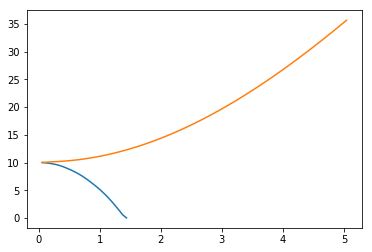

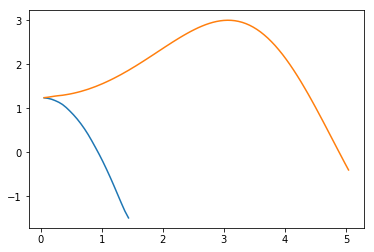

In [15]:
results=pd.DataFrame(results)

plt.figure()
plt.plot(results['time'][results['episode']==1],
         results['z'][results['episode']==1])
plt.plot(results['time'][results['episode']==97],
         results['z'][results['episode']==97])

plt.figure()
plt.plot(results['time'][results['episode']==1],
         results['reward'][results['episode']==1])
plt.plot(results['time'][results['episode']==97],
         results['reward'][results['episode']==97])

len(results)/64

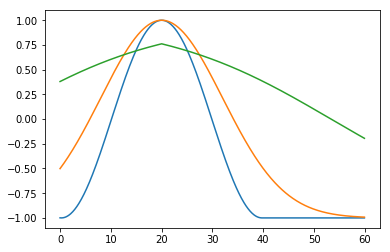

In [9]:
x0 = 20
x = np.arange(0,60,0.1)

y1 = np.cos((x-x0)/(2*np.pi))
y1 = np.where(x>40,-1,y1)
s = 12
y2 = 2*np.exp(-(x-x0)**2/(2*s*s))-1
y3 = np.tanh(1-0.03*np.abs(x-x0))


plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

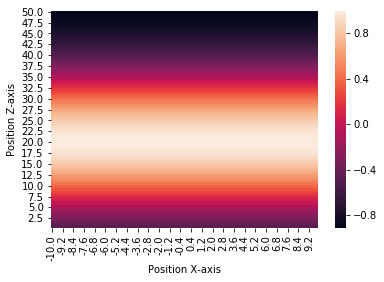

In [12]:
import seaborn as sns

x_range = np.round(np.arange(-10,10,0.2), 2)
z_range = np.round(np.arange(50,0,-0.5), 2)
target_pos = [0, 20]

def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R

#eucl_distance = lambda a, b: np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2) # Alternative: np.linalg.norm(a-b)
s = 12
eucl_distance = lambda a, b: 2*np.exp(-(a[1]-b[1])**2/(2*s*s))-1 # Alternative: np.linalg.norm(a-b)
reward_function = lambda pose, target_pos: eucl_distance(pose, target_pos)

R = map_function(reward_function, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
plt.show()

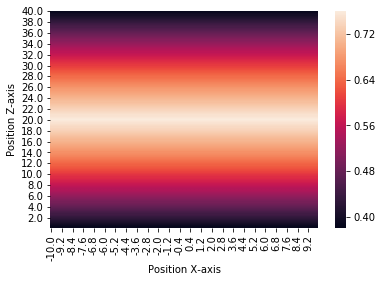

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R


reward_function = lambda pose, target_pos: np.tanh(1.-.03*(abs(pose[1] - target_pos[1])))

x_range = np.round(np.arange(-10.0,10,0.1), 2)
z_range = np.round(np.arange(40,0,-0.2), 2)

target_pos = np.array([0, 20])

R = map_function(reward_function, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
plt.show()

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [ ]:
## TODO: Train your agent here.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: